In [7]:
from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np
from tabulate import tabulate
from scipy import stats

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

np.random.seed(8)
random.seed(8)

from src.preprocessing import *
from src.model_architecture import *
from src.training_model import *
from src.postprocessing import *
from src.comparing_results import *

#to avoid printing ggplot warnings
import warnings 
warnings.simplefilter("ignore")

%matplotlib inline

### Defining parameters

In [8]:
list_paddings = [ 'post_padding', 'pre_padding', 'mid_padding', 'strf_padding', 'ext_padding', 
                 'rnd_padding', 'aug_padding', 'zoom_padding']

#hierarchy of folders: annotation/dataset/architecture/n_neurs/task/padding

folder1 = 'EC_number/archaea/1conv/64filts_size5/' 
folder2 = 'EC_number/archaea/3denses/bio_neurons/'
folder3 = 'EC_number/archaea/stack_conv/10filts_sizeJurtz/'
column = "EC number"

n_folds = 10

dicti = creating_dict()

max_lenn = 1000

In [9]:
folders = [folder1, folder2, folder3]
names_folders = ["1_conv", "only_denses", "stack_conv"]

## Comparing accuracy

### Task 1

In [10]:
task = "task1/"
task_string = "Task 1"

In [11]:
scores_arch_task1, accu_arch_task1 = processing_metrics_dodge(list_paddings, folders, names_folders, task, n_folds)
scores_final_task1 = pd.concat([scores_arch_task1[0], scores_arch_task1[1], scores_arch_task1[2]])
accu_final_task1 = pd.concat([accu_arch_task1[0], accu_arch_task1[1], accu_arch_task1[2]])

In [12]:
accu_final_task1.head()

,index,variable,value,architecture
0,0,post_padding,0.859697,1_conv
1,1,post_padding,0.882050,1_conv
2,2,post_padding,0.878611,1_conv
3,3,post_padding,0.877235,1_conv
4,4,post_padding,0.869326,1_conv


In [45]:
scores_final_task1.head()

,enz_type,index,type_padding,architecture,variable,value
0,0,0,post_padding,1_conv,f1-score,0.854804
1,1,0,post_padding,1_conv,f1-score,0.864271
2,micro avg,0,post_padding,1_conv,f1-score,0.859697
3,macro avg,0,post_padding,1_conv,f1-score,0.859538
4,weighted avg,0,post_padding,1_conv,f1-score,0.860010


In [ ]:
# Saving scores and accuracy to build explanatory linear models
file_scores = ''.join(string for string in [absPath,'data/results/', task, "scores_final.csv"])
scores_final_task1.to_csv(file_scores)

file_accu = ''.join(string for string in [absPath,'data/results/', task, "accu_final.csv"])
accu_final_task1.to_csv(file_accu)

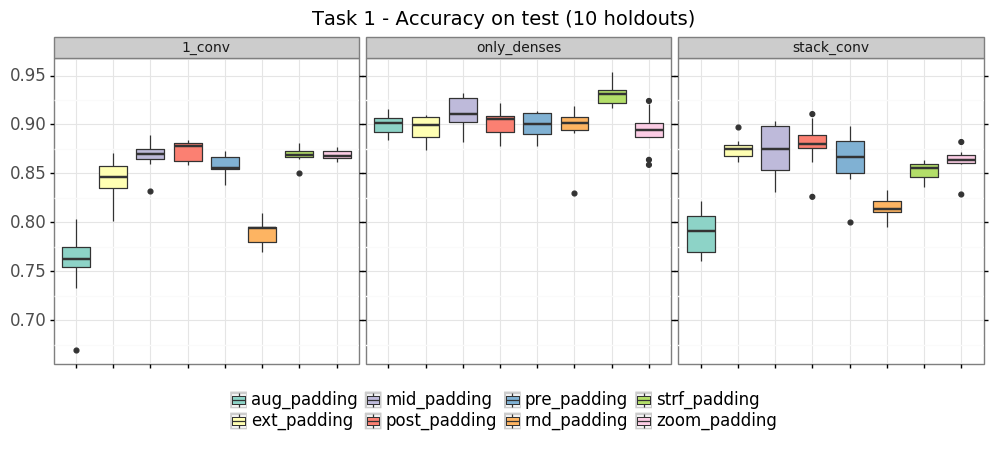

<ggplot: (-9223363275738048410)>

In [13]:
plotting_acc_dodge_boxplots(accu_final_task1, n_folds, task_string, task)

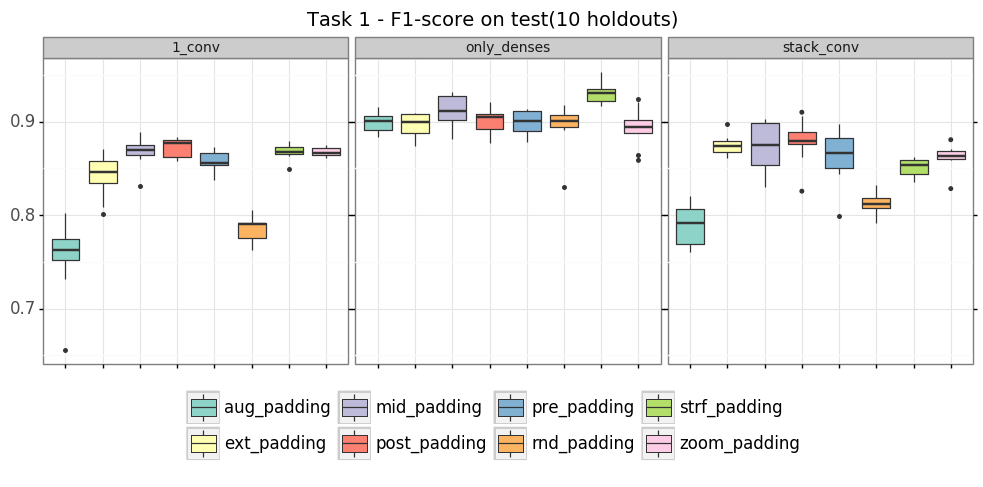

<ggplot: (8761115923383)>

In [14]:
plotting_f1_macro(scores_final_task1, n_folds, task_string, task)

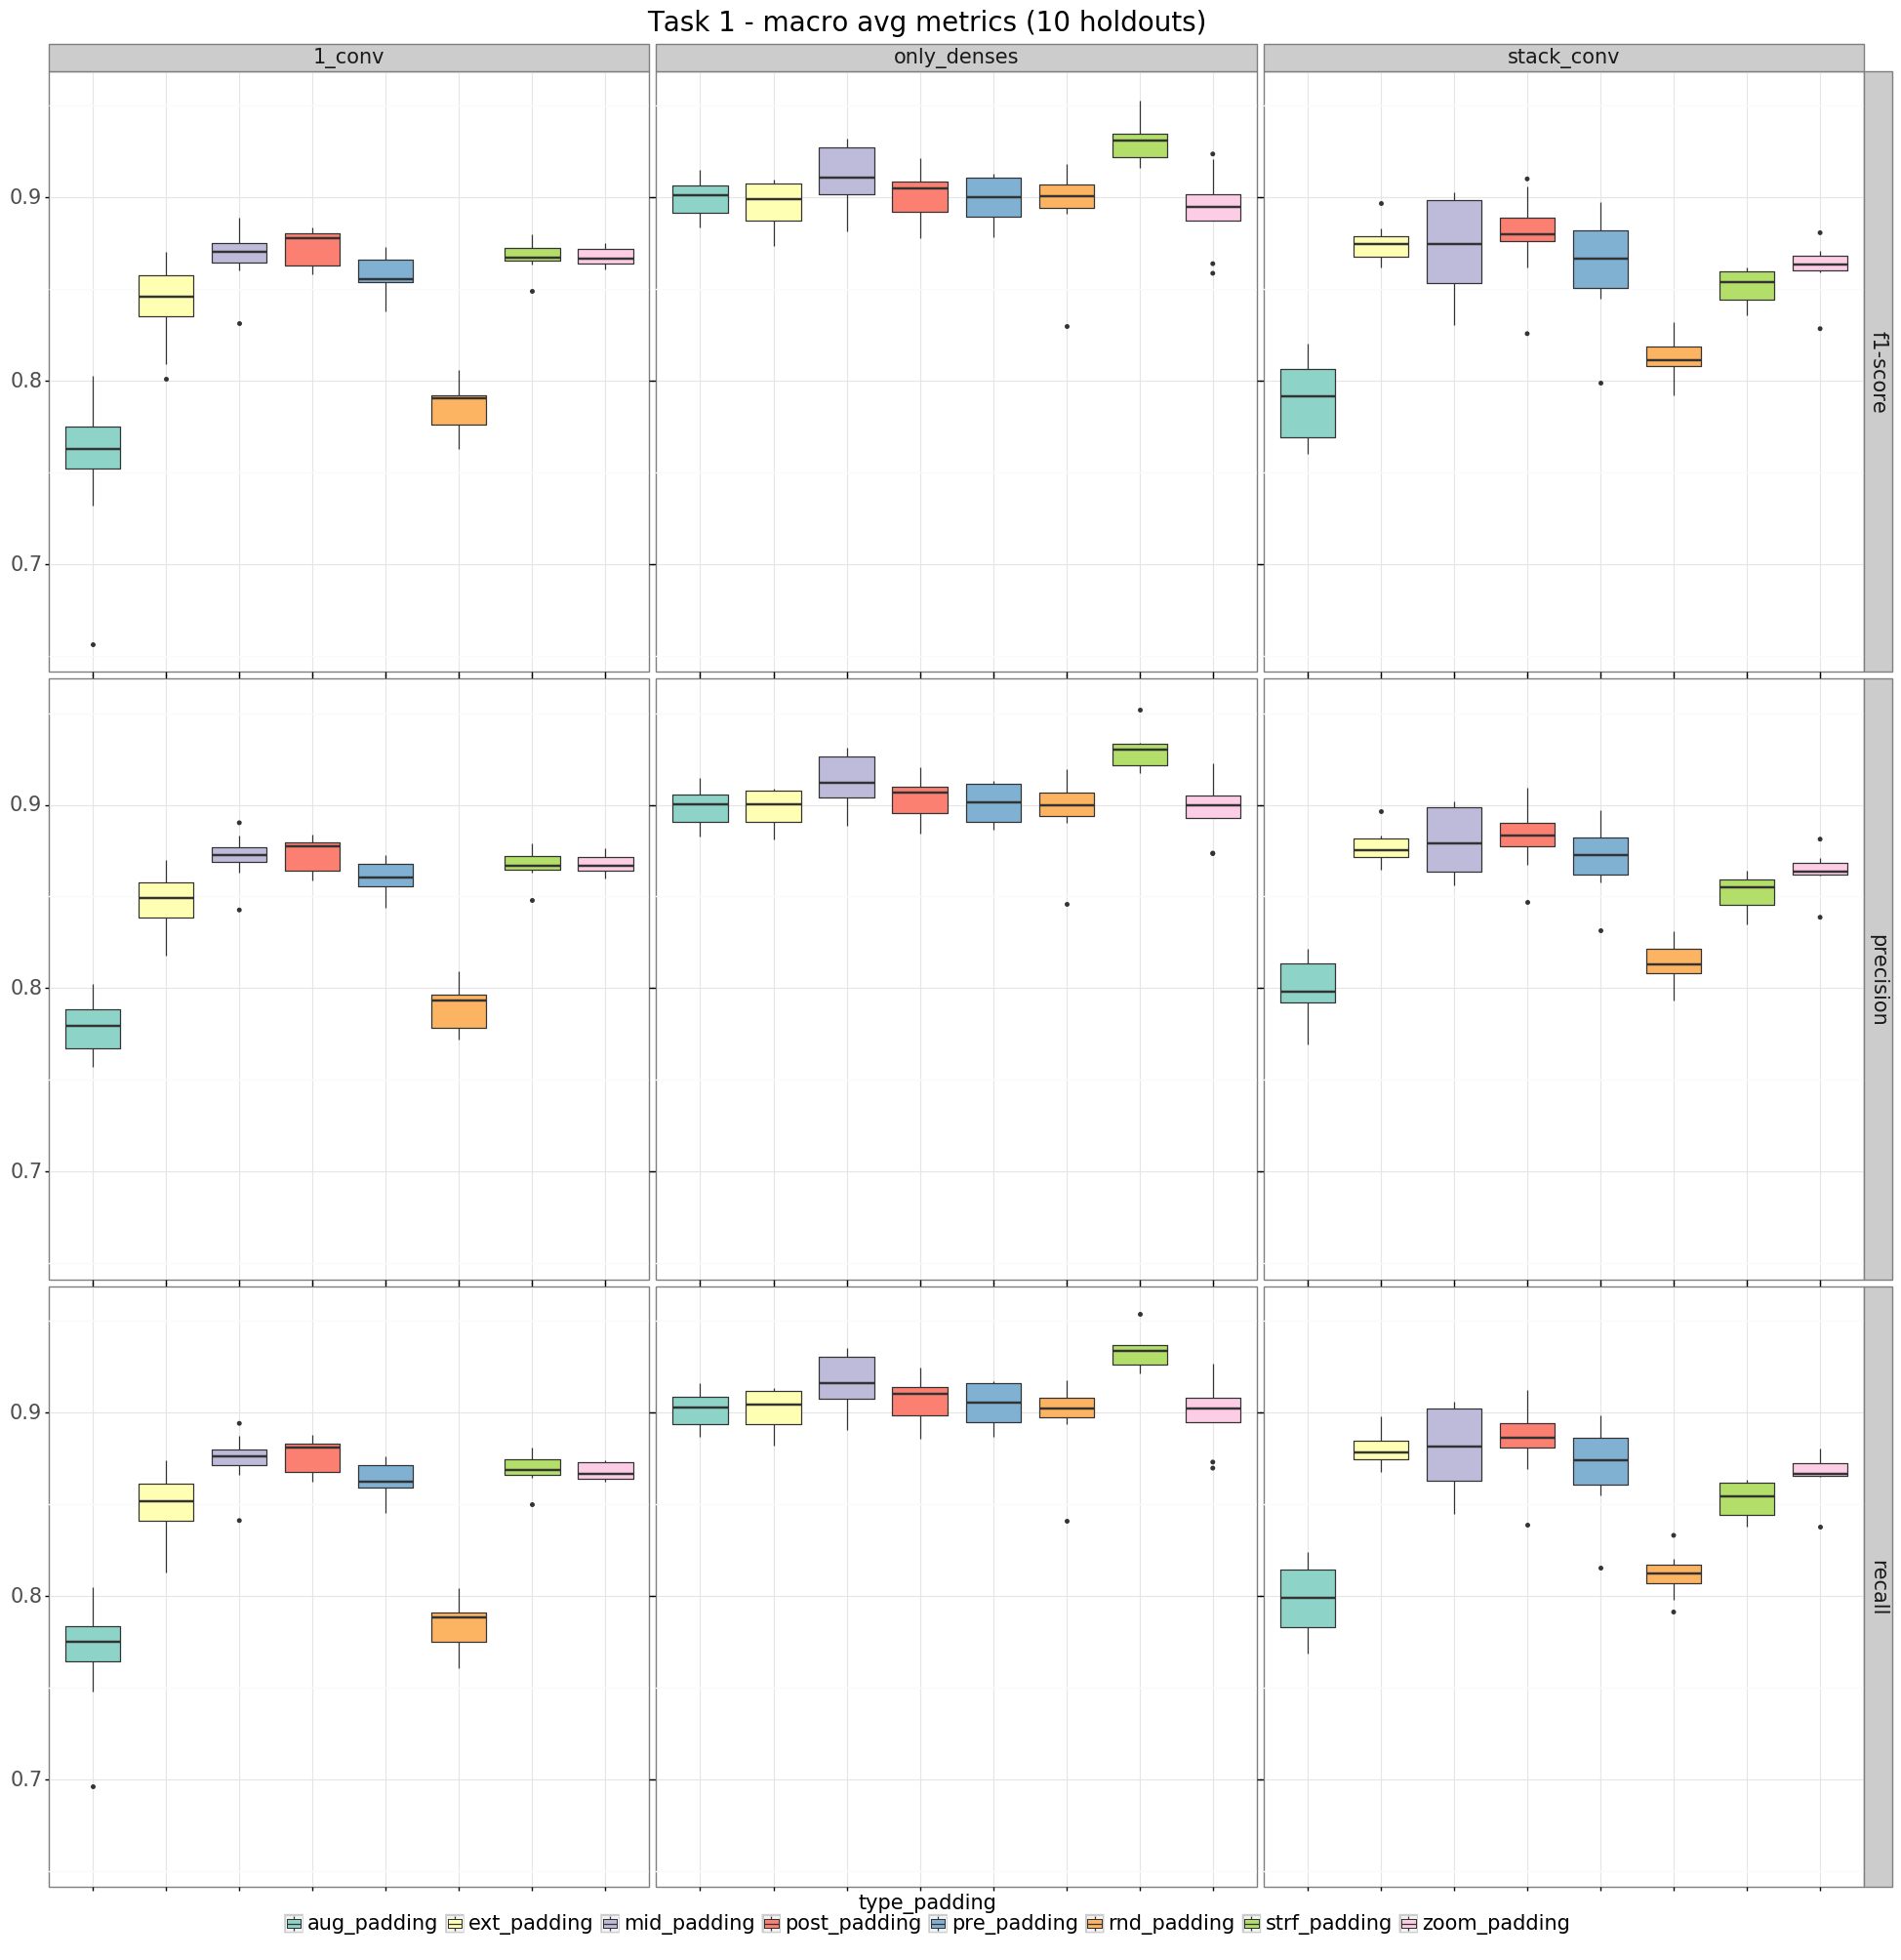

<ggplot: (-9223363275739212905)>

In [15]:
plotting_scores_arch(scores_final_task1, n_folds, task_string, task, "macro avg")

In [16]:
auc_arch_task1 = processing_auc_dodge(list_paddings, folders, names_folders, "task1/", n_folds)
auc_final_task1 = pd.concat([auc_arch_task1[0], auc_arch_task1[1], auc_arch_task1[2]])
auc_final_task1.drop("level_0", 1, inplace=True)

### Task 2

In [17]:
task = "task2/"
task_string = "Task 2"

In [18]:
scores_arch_task2, accu_arch_task2 = processing_metrics_dodge(list_paddings, folders, names_folders, task, n_folds)
scores_final_task2 = pd.concat([scores_arch_task2[0], scores_arch_task2[1], scores_arch_task2[2]])
accu_final_task2 = pd.concat([accu_arch_task2[0], accu_arch_task2[1], accu_arch_task2[2]])

In [ ]:
# Saving scores and accuracy to build explanatory linear models
file_scores = ''.join(string for string in [absPath,'data/results/', task, "scores_final.csv"])
scores_final_task2.to_csv(file_scores)

file_accu = ''.join(string for string in [absPath,'data/results/', task, "accu_final.csv"])
accu_final_task2.to_csv(file_accu)

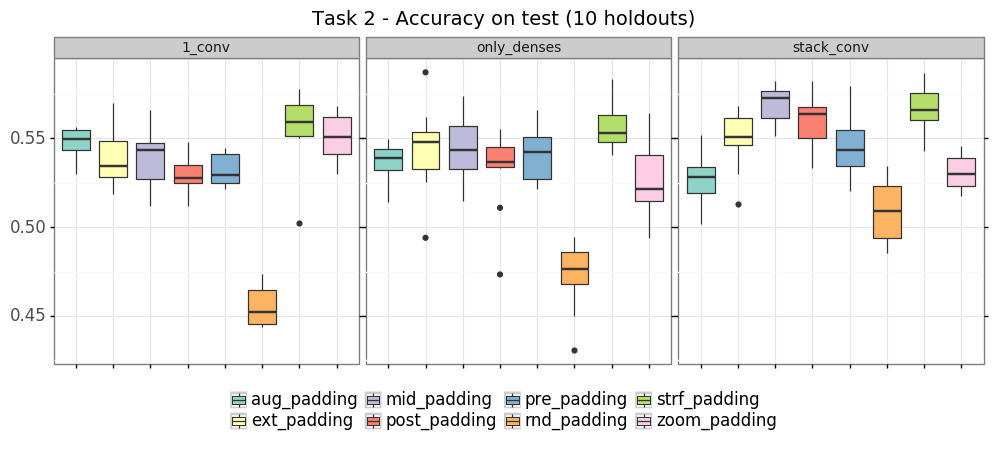

<ggplot: (8761115900157)>

In [19]:
plotting_acc_dodge_boxplots(accu_final_task2, n_folds, task_string, task)

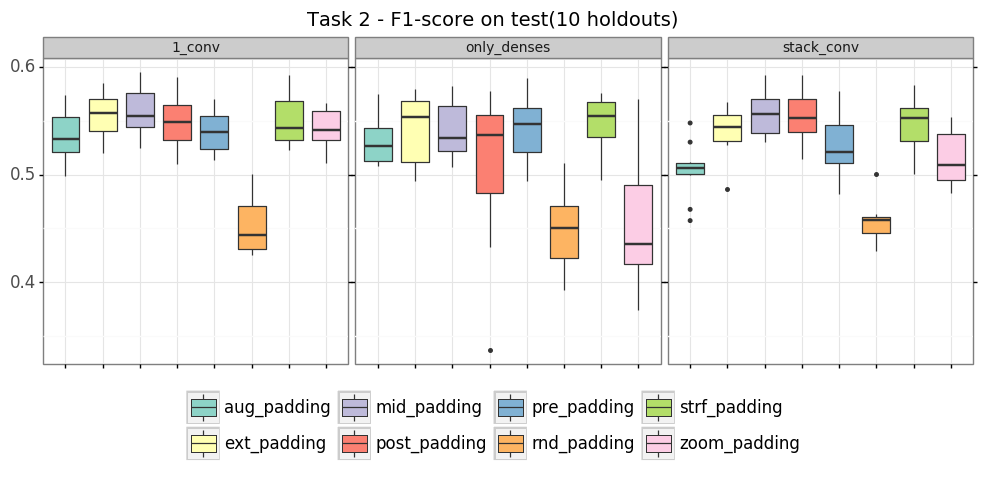

<ggplot: (-9223363275738680937)>

In [20]:
plotting_f1_macro(scores_final_task2, n_folds, task_string, task)

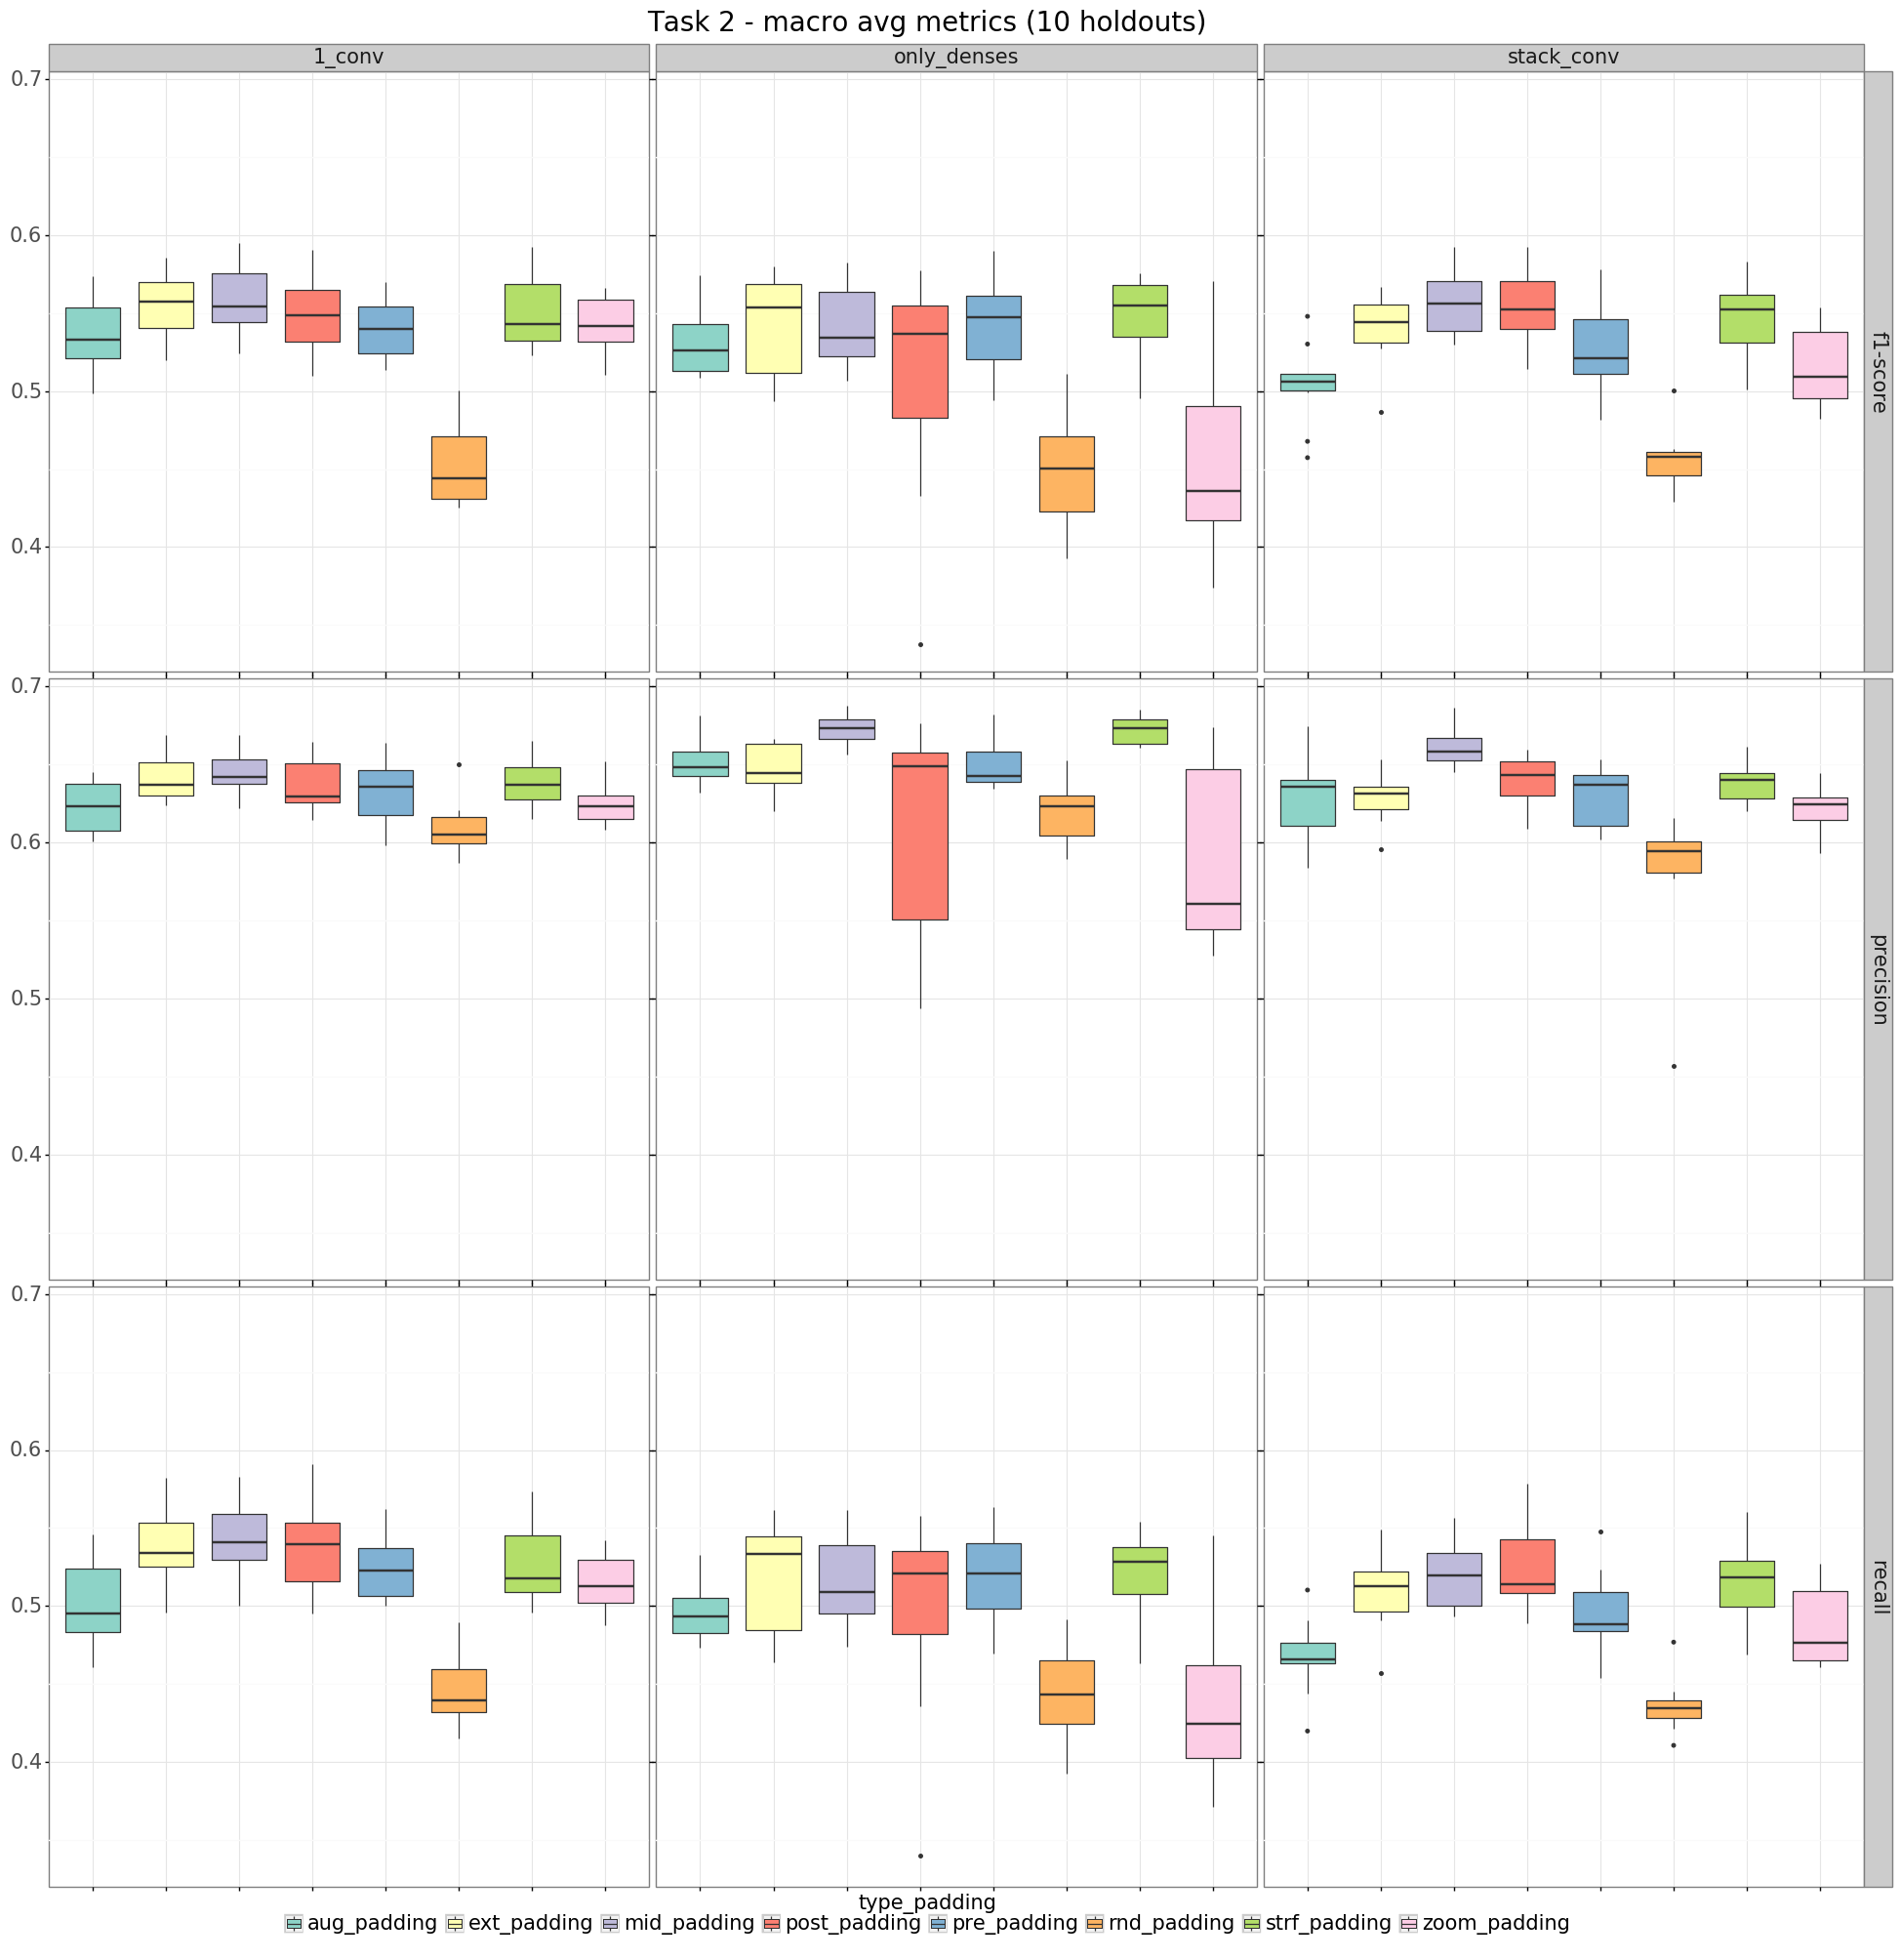

<ggplot: (8761114755960)>

In [21]:
plotting_scores_arch(scores_final_task2, n_folds, task_string, task, "macro avg")

# Formatting table

In [22]:
def formatting_table(df_task1, df_task2, metrics, var_padding, var_val):
    df_task1['task'] = "task1"
    df_task2['task'] = "task2"
    #joining both dataframes
    df_final = pd.concat([df_task1, df_task2])
    df_group = df_final.groupby(["task", "architecture", var_padding], 
                                as_index=False).agg({var_val:['mean','std']})
    df_group.columns = ['_'.join(col) for col in df_group.columns]
    df_group[metrics] = df_group[['value_mean','value_std']].apply(lambda x : 
                                                                          '{:0.3f} $\pm$ {:0.3f}'.format(x[0],x[1]), axis=1)
    var_padding_ = var_padding + "_"
    df_def =df_group.loc[:,['task_', 'architecture_', var_padding_, 
                                 metrics]].set_index(['task_', 'architecture_', var_padding_]).unstack(level=-1)
    df_def_t = df_def.stack().unstack(level=1)
    print(tabulate(df_def_t, headers="keys", tablefmt='latex_raw'))
    return df_def_t
    

## Accuracy

In [23]:
accu_final = formatting_table(accu_final_task1, accu_final_task2, "accuracy", "variable", "value")

\begin{tabular}{llll}
\hline
                           & ('accuracy', '1_conv')   & ('accuracy', 'only_denses')   & ('accuracy', 'stack_conv')   \\
\hline
 ('task1', 'aug_padding')  & 0.758 $\pm$ 0.037        & 0.901 $\pm$ 0.011             & 0.790 $\pm$ 0.023            \\
 ('task1', 'ext_padding')  & 0.843 $\pm$ 0.023        & 0.896 $\pm$ 0.014             & 0.875 $\pm$ 0.010            \\
 ('task1', 'mid_padding')  & 0.868 $\pm$ 0.016        & 0.911 $\pm$ 0.018             & 0.874 $\pm$ 0.027            \\
 ('task1', 'post_padding') & 0.873 $\pm$ 0.010        & 0.900 $\pm$ 0.014             & 0.879 $\pm$ 0.024            \\
 ('task1', 'pre_padding')  & 0.858 $\pm$ 0.011        & 0.899 $\pm$ 0.013             & 0.863 $\pm$ 0.028            \\
 ('task1', 'rnd_padding')  & 0.790 $\pm$ 0.013        & 0.897 $\pm$ 0.025             & 0.815 $\pm$ 0.011            \\
 ('task1', 'strf_padding') & 0.868 $\pm$ 0.008        & 0.930 $\pm$ 0.011             & 0.852 $\pm$ 0.010            \\
 ('t

In [24]:
accu_final

accuracy                                      
architecture_                  1_conv        only_denses         stack_conv
task_ variable_                                                            
task1 aug_padding   0.758 $\pm$ 0.037  0.901 $\pm$ 0.011  0.790 $\pm$ 0.023
      ext_padding   0.843 $\pm$ 0.023  0.896 $\pm$ 0.014  0.875 $\pm$ 0.010
      mid_padding   0.868 $\pm$ 0.016  0.911 $\pm$ 0.018  0.874 $\pm$ 0.027
      post_padding  0.873 $\pm$ 0.010  0.900 $\pm$ 0.014  0.879 $\pm$ 0.024
      pre_padding   0.858 $\pm$ 0.011  0.899 $\pm$ 0.013  0.863 $\pm$ 0.028
      rnd_padding   0.790 $\pm$ 0.013  0.897 $\pm$ 0.025  0.815 $\pm$ 0.011
      strf_padding  0.868 $\pm$ 0.008  0.930 $\pm$ 0.011  0.852 $\pm$ 0.010
      zoom_padding  0.869 $\pm$ 0.005  0.893 $\pm$ 0.021  0.863 $\pm$ 0.014
task2 aug_padding   0.548 $\pm$ 0.009  0.536 $\pm$ 0.012  0.527 $\pm$ 0.015
      ext_padding   0.539 $\pm$ 0.016  0.544 $\pm$ 0.025  0.549 $\pm$ 0.017
      mid_padding   0.539 $\pm$ 0.017  0.545 $\pm$ 0.018  0.569 $\pm$ 0.011
      post_padding  0.530 $\pm$ 0.011  0.532 $\pm$ 0.024  0.560 $\pm$ 0.016
      pre_padding   0.532 $\pm$ 0.009  0.542 $\pm$ 0.016  0.545 $\pm$ 0.018
      rnd_padding   0.455 $\pm$ 0.011  0.473 $\pm$ 0.020  0.509 $\pm$ 0.017
      strf_padding  0.556 $\pm$ 0.021  0.556 $\pm$ 0.012  0.565 $\pm$ 0.015
      zoom_padding  0.550 $\pm$ 0.014  0.528 $\pm$ 0.021  0.531 $\pm$ 0.010

## F1-score

In [25]:
#task 1
scores_final_task1_f1 = scores_final_task1[scores_final_task1.variable == "f1-score"]
scores_final_task1_f1_macro = scores_final_task1_f1[scores_final_task1_f1.enz_type == "macro avg"]
scores_final_task1_f1_macro["task"] = "task1"
#scores_final_task1_f1_macro.head()

#task 2
scores_final_task2_f1 = scores_final_task2[scores_final_task2.variable == "f1-score"]
scores_final_task2_f1_macro = scores_final_task2_f1[scores_final_task2_f1.enz_type == "macro avg"]
scores_final_task2_f1_macro["task"] = "task2"

f1_total = pd.concat([scores_final_task1_f1_macro, scores_final_task2_f1_macro])

f1_final = formatting_table(scores_final_task1_f1_macro, scores_final_task2_f1_macro, "f1_score", "type_padding", "value")

\begin{tabular}{llll}
\hline
                           & ('f1_score', '1_conv')   & ('f1_score', 'only_denses')   & ('f1_score', 'stack_conv')   \\
\hline
 ('task1', 'aug_padding')  & 0.756 $\pm$ 0.041        & 0.900 $\pm$ 0.011             & 0.790 $\pm$ 0.022            \\
 ('task1', 'ext_padding')  & 0.842 $\pm$ 0.022        & 0.896 $\pm$ 0.013             & 0.875 $\pm$ 0.010            \\
 ('task1', 'mid_padding')  & 0.868 $\pm$ 0.016        & 0.911 $\pm$ 0.018             & 0.874 $\pm$ 0.026            \\
 ('task1', 'post_padding') & 0.873 $\pm$ 0.010        & 0.900 $\pm$ 0.014             & 0.879 $\pm$ 0.024            \\
 ('task1', 'pre_padding')  & 0.858 $\pm$ 0.011        & 0.899 $\pm$ 0.013             & 0.863 $\pm$ 0.028            \\
 ('task1', 'rnd_padding')  & 0.786 $\pm$ 0.014        & 0.896 $\pm$ 0.025             & 0.812 $\pm$ 0.011            \\
 ('task1', 'strf_padding') & 0.867 $\pm$ 0.008        & 0.930 $\pm$ 0.011             & 0.851 $\pm$ 0.010            \\
 ('t

In [26]:
f1_final

f1_score                                      
architecture_                   1_conv        only_denses         stack_conv
task_ type_padding_                                                         
task1 aug_padding    0.756 $\pm$ 0.041  0.900 $\pm$ 0.011  0.790 $\pm$ 0.022
      ext_padding    0.842 $\pm$ 0.022  0.896 $\pm$ 0.013  0.875 $\pm$ 0.010
      mid_padding    0.868 $\pm$ 0.016  0.911 $\pm$ 0.018  0.874 $\pm$ 0.026
      post_padding   0.873 $\pm$ 0.010  0.900 $\pm$ 0.014  0.879 $\pm$ 0.024
      pre_padding    0.858 $\pm$ 0.011  0.899 $\pm$ 0.013  0.863 $\pm$ 0.028
      rnd_padding    0.786 $\pm$ 0.014  0.896 $\pm$ 0.025  0.812 $\pm$ 0.011
      strf_padding   0.867 $\pm$ 0.008  0.930 $\pm$ 0.011  0.851 $\pm$ 0.010
      zoom_padding   0.868 $\pm$ 0.005  0.893 $\pm$ 0.021  0.862 $\pm$ 0.014
task2 aug_padding    0.536 $\pm$ 0.025  0.531 $\pm$ 0.022  0.504 $\pm$ 0.026
      ext_padding    0.554 $\pm$ 0.022  0.543 $\pm$ 0.034  0.540 $\pm$ 0.023
      mid_padding    0.558 $\pm$ 0.021  0.542 $\pm$ 0.027  0.557 $\pm$ 0.024
      post_padding   0.550 $\pm$ 0.025  0.509 $\pm$ 0.075  0.554 $\pm$ 0.024
      pre_padding    0.541 $\pm$ 0.020  0.541 $\pm$ 0.030  0.527 $\pm$ 0.028
      rnd_padding    0.452 $\pm$ 0.026  0.448 $\pm$ 0.034  0.455 $\pm$ 0.020
      strf_padding   0.550 $\pm$ 0.024  0.548 $\pm$ 0.026  0.547 $\pm$ 0.024
      zoom_padding   0.543 $\pm$ 0.019  0.456 $\pm$ 0.063  0.515 $\pm$ 0.026

#### Comparisons (Wilcox)

In [27]:
scores_final_task1_f1_macro.head()

,enz_type,index,type_padding,architecture,variable,value,task
3,macro avg,0,post_padding,1_conv,f1-score,0.859538,task1
8,macro avg,0,pre_padding,1_conv,f1-score,0.872689,task1
13,macro avg,0,mid_padding,1_conv,f1-score,0.863793,task1
18,macro avg,0,strf_padding,1_conv,f1-score,0.873687,task1
23,macro avg,0,ext_padding,1_conv,f1-score,0.847652,task1


In [28]:
# Wilcox test to check if there are differences between TASK1 and TASK2
stats.wilcoxon(scores_final_task1_f1_macro.value, scores_final_task2_f1_macro.value)

WilcoxonResult(statistic=0.0, pvalue=4.0152564343845088e-41)

In [29]:
# compare between architectures
arch_1conv_task1 = scores_final_task1_f1_macro.loc[scores_final_task1_f1_macro.architecture == "1_conv",]
arch_1conv_task2 = scores_final_task2_f1_macro.loc[scores_final_task2_f1_macro.architecture == "1_conv",]
arch_stack_task1 = scores_final_task1_f1_macro.loc[scores_final_task1_f1_macro.architecture == "stack_conv",]
arch_stack_task2 = scores_final_task2_f1_macro.loc[scores_final_task2_f1_macro.architecture == "stack_conv",]
arch_denses_task1 = scores_final_task1_f1_macro.loc[scores_final_task1_f1_macro.architecture == "only_denses",]
arch_denses_task2 = scores_final_task2_f1_macro.loc[scores_final_task2_f1_macro.architecture == "only_denses",]

In [30]:
# Wilcox test to check if there are differences between architectures
print("Task 1: 1_conv vs stack_conv ", stats.wilcoxon(arch_1conv_task1.value, arch_stack_task1.value))
print("Task 1: 1_conv vs only_denses ", stats.wilcoxon(arch_1conv_task1.value, arch_denses_task1.value))
print("Task 1: stack_conv vs only_denses ", stats.wilcoxon(arch_stack_task1.value, arch_denses_task1.value))

Task 1: 1_conv vs stack_conv  WilcoxonResult(statistic=899.0, pvalue=0.00054395284857041337)
Task 1: 1_conv vs only_denses  WilcoxonResult(statistic=4.0, pvalue=9.1315338802687677e-15)
Task 1: stack_conv vs only_denses  WilcoxonResult(statistic=106.0, pvalue=3.8259797991223584e-13)


In [31]:
# Wilcox test to check if there are differences between architectures
print("Task 2: 1_conv vs stack_conv ", stats.wilcoxon(arch_1conv_task2.value, arch_stack_task2.value))
print("Task 2: 1_conv vs only_denses ", stats.wilcoxon(arch_1conv_task2.value, arch_denses_task2.value))
print("Task 2: stack_conv vs only_denses ", stats.wilcoxon(arch_stack_task2.value, arch_denses_task2.value))

Task 2: 1_conv vs stack_conv  WilcoxonResult(statistic=727.0, pvalue=1.8432016188898606e-05)
Task 2: 1_conv vs only_denses  WilcoxonResult(statistic=930.0, pvalue=0.00093483413540696272)
Task 2: stack_conv vs only_denses  WilcoxonResult(statistic=1552.0, pvalue=0.74431273829779387)


## Precision

In [32]:
#task 1
scores_final_task1_precision = scores_final_task1[scores_final_task1.variable == "precision"]
scores_final_task1_precision_macro = scores_final_task1_precision[scores_final_task1_precision.enz_type == "macro avg"]
scores_final_task1_precision_macro["task"] = "task1"
#scores_final_task1_precision_macro.head()

#task 2
scores_final_task2_precision = scores_final_task2[scores_final_task2.variable == "precision"]
scores_final_task2_precision_macro = scores_final_task2_precision[scores_final_task2_precision.enz_type == "macro avg"]
scores_final_task2_precision_macro["task"] = "task2"
#scores_final_task2_precision_macro.head()

In [33]:
precision_final = formatting_table(scores_final_task1_precision_macro, scores_final_task2_precision_macro, "f1_score", "type_padding", "value")

\begin{tabular}{llll}
\hline
                           & ('f1_score', '1_conv')   & ('f1_score', 'only_denses')   & ('f1_score', 'stack_conv')   \\
\hline
 ('task1', 'aug_padding')  & 0.778 $\pm$ 0.014        & 0.899 $\pm$ 0.011             & 0.800 $\pm$ 0.018            \\
 ('task1', 'ext_padding')  & 0.847 $\pm$ 0.016        & 0.898 $\pm$ 0.011             & 0.877 $\pm$ 0.009            \\
 ('task1', 'mid_padding')  & 0.872 $\pm$ 0.013        & 0.912 $\pm$ 0.016             & 0.880 $\pm$ 0.019            \\
 ('task1', 'post_padding') & 0.873 $\pm$ 0.009        & 0.903 $\pm$ 0.012             & 0.883 $\pm$ 0.018            \\
 ('task1', 'pre_padding')  & 0.861 $\pm$ 0.009        & 0.901 $\pm$ 0.011             & 0.871 $\pm$ 0.018            \\
 ('task1', 'rnd_padding')  & 0.790 $\pm$ 0.013        & 0.897 $\pm$ 0.020             & 0.814 $\pm$ 0.011            \\
 ('task1', 'strf_padding') & 0.867 $\pm$ 0.008        & 0.930 $\pm$ 0.010             & 0.852 $\pm$ 0.010            \\
 ('t

## Recall

In [34]:
#task 1
scores_final_task1_recall = scores_final_task1[scores_final_task1.variable == "recall"]
scores_final_task1_recall_macro = scores_final_task1_recall[scores_final_task1_recall.enz_type == "macro avg"]
scores_final_task1_recall_macro["task"] = "task1"
#scores_final_task1_recall_macro.head()

#task 2
scores_final_task2_recall = scores_final_task2[scores_final_task2.variable == "recall"]
scores_final_task2_recall_macro = scores_final_task2_recall[scores_final_task2_recall.enz_type == "macro avg"]
scores_final_task2_recall_macro["task"] = "task2"
#scores_final_task2_recall_macro.head()

In [35]:
recall_final = formatting_table(scores_final_task1_recall_macro, scores_final_task2_recall_macro, "f1_score", "type_padding", "value")

\begin{tabular}{llll}
\hline
                           & ('f1_score', '1_conv')   & ('f1_score', 'only_denses')   & ('f1_score', 'stack_conv')   \\
\hline
 ('task1', 'aug_padding')  & 0.768 $\pm$ 0.030        & 0.902 $\pm$ 0.010             & 0.798 $\pm$ 0.019            \\
 ('task1', 'ext_padding')  & 0.849 $\pm$ 0.019        & 0.901 $\pm$ 0.012             & 0.880 $\pm$ 0.009            \\
 ('task1', 'mid_padding')  & 0.874 $\pm$ 0.014        & 0.916 $\pm$ 0.016             & 0.880 $\pm$ 0.023            \\
 ('task1', 'post_padding') & 0.877 $\pm$ 0.009        & 0.906 $\pm$ 0.013             & 0.885 $\pm$ 0.021            \\
 ('task1', 'pre_padding')  & 0.863 $\pm$ 0.009        & 0.904 $\pm$ 0.012             & 0.870 $\pm$ 0.024            \\
 ('task1', 'rnd_padding')  & 0.785 $\pm$ 0.014        & 0.898 $\pm$ 0.022             & 0.811 $\pm$ 0.012            \\
 ('task1', 'strf_padding') & 0.869 $\pm$ 0.008        & 0.933 $\pm$ 0.009             & 0.853 $\pm$ 0.010            \\
 ('t

## AUC for task 1

In [36]:
auc_final_task1.head()

,variable,value,architecture
0,post_padding,0.939015,1_conv
1,post_padding,0.948821,1_conv
2,post_padding,0.946051,1_conv
3,post_padding,0.949160,1_conv
4,post_padding,0.945973,1_conv


In [37]:
auc_group = auc_final_task1.groupby(["architecture", "variable"], as_index=False).agg({'value':['mean','std']})

In [38]:
auc_group.columns

MultiIndex(levels=[['value', 'variable', 'architecture'], ['mean', 'std', '']],
           codes=[[2, 1, 0, 0], [2, 2, 0, 1]])

In [39]:
auc_group.columns = ['_'.join(col) for col in auc_group.columns]
auc_group.head()

,architecture_,variable_,value_mean,value_std
0,1_conv,aug_padding,0.859490,0.020565
1,1_conv,ext_padding,0.927182,0.010968
2,1_conv,mid_padding,0.945122,0.008635
3,1_conv,post_padding,0.945257,0.007165
4,1_conv,pre_padding,0.935433,0.006144


In [40]:
auc_group["auc"] = auc_group[["value_mean", "value_std"]].apply(lambda x: '{:0.3f} $\pm$ {:0.3f}'.format(x[0],x[1]), axis=1)
auc_group.head()

,architecture_,variable_,value_mean,value_std,auc
0,1_conv,aug_padding,0.859490,0.020565,0.859 $\pm$ 0.021
1,1_conv,ext_padding,0.927182,0.010968,0.927 $\pm$ 0.011
2,1_conv,mid_padding,0.945122,0.008635,0.945 $\pm$ 0.009
3,1_conv,post_padding,0.945257,0.007165,0.945 $\pm$ 0.007
4,1_conv,pre_padding,0.935433,0.006144,0.935 $\pm$ 0.006


In [41]:
auc_def = auc_group.loc[:, ['architecture_', 'variable_', 'auc']].set_index(['architecture_', 'variable_']).unstack(level=-1)

In [42]:
auc_def

auc                                        \
variable_            aug_padding        ext_padding        mid_padding   
architecture_                                                            
1_conv         0.859 $\pm$ 0.021  0.927 $\pm$ 0.011  0.945 $\pm$ 0.009   
only_denses    0.951 $\pm$ 0.010  0.966 $\pm$ 0.003  0.972 $\pm$ 0.006   
stack_conv     0.891 $\pm$ 0.013  0.949 $\pm$ 0.005  0.952 $\pm$ 0.010   

                                                                        \
variable_           post_padding        pre_padding        rnd_padding   
architecture_                                                            
1_conv         0.945 $\pm$ 0.007  0.935 $\pm$ 0.006  0.871 $\pm$ 0.011   
only_denses    0.969 $\pm$ 0.003  0.967 $\pm$ 0.004  0.946 $\pm$ 0.014   
stack_conv     0.956 $\pm$ 0.007  0.949 $\pm$ 0.008  0.891 $\pm$ 0.009   

                                                     
variable_           strf_padding       zoom_padding  
architecture_                                        
1_conv         0.939 $\pm$ 0.006  0.937 $\pm$ 0.004  
only_denses    0.978 $\pm$ 0.003  0.978 $\pm$ 0.005  
stack_conv     0.927 $\pm$ 0.006  0.944 $\pm$ 0.005

In [43]:
auc_def_t = auc_def.transpose()

In [44]:
print(tabulate(auc_def_t, headers="keys", tablefmt='latex_raw'))

\begin{tabular}{llll}
\hline
                         & 1_conv            & only_denses       & stack_conv        \\
\hline
 ('auc', 'aug_padding')  & 0.859 $\pm$ 0.021 & 0.951 $\pm$ 0.010 & 0.891 $\pm$ 0.013 \\
 ('auc', 'ext_padding')  & 0.927 $\pm$ 0.011 & 0.966 $\pm$ 0.003 & 0.949 $\pm$ 0.005 \\
 ('auc', 'mid_padding')  & 0.945 $\pm$ 0.009 & 0.972 $\pm$ 0.006 & 0.952 $\pm$ 0.010 \\
 ('auc', 'post_padding') & 0.945 $\pm$ 0.007 & 0.969 $\pm$ 0.003 & 0.956 $\pm$ 0.007 \\
 ('auc', 'pre_padding')  & 0.935 $\pm$ 0.006 & 0.967 $\pm$ 0.004 & 0.949 $\pm$ 0.008 \\
 ('auc', 'rnd_padding')  & 0.871 $\pm$ 0.011 & 0.946 $\pm$ 0.014 & 0.891 $\pm$ 0.009 \\
 ('auc', 'strf_padding') & 0.939 $\pm$ 0.006 & 0.978 $\pm$ 0.003 & 0.927 $\pm$ 0.006 \\
 ('auc', 'zoom_padding') & 0.937 $\pm$ 0.004 & 0.978 $\pm$ 0.005 & 0.944 $\pm$ 0.005 \\
\hline
\end{tabular}
